In [1]:
#tuon tarvittavat kirjastot

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#tyyli vaikuttaa kaavion ulkoasuun
plt.style.use('seaborn-whitegrid')

#aikasarjojen kohdalla tuunataan aika-akselia omilla kirjastoilla
from matplotlib.ticker import MultipleLocator
from matplotlib.dates import DateFormatter


#säädetään aika-asteikkoa niin että se menee 14 päivän eli kahden viikon välein
myLoc = MultipleLocator(14)

#voidaan formatoida päivämääriä muotoon päivä/kuukausi
myFmt = DateFormatter('%d/%m')

In [2]:

#avataan aineistona Metso Oyj:n osakkeiden hinnat, joka on Nasdaq Helsingin sivuilta ladattu
#skiprows-komennon avulla poistan ensimmäisen rivin, koska se on turha tässä
#sep tarkoittaa erotinta ja määrään sen olla ; ja desimaalin merkkinä määrään olla ,

metso = pd.read_csv('METSO-2017-11-15-2019-11-15.csv', sep = ';', decimal = ',', skiprows=1)

#katson viisi ensimmäistä riviä
metso.head()


,Date,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades,Unnamed: 11
0,2019-11-15,34.32,34.36,34.40,34.49,34.00,34.35,34.298,384489,13187099.07,2775,NaN
1,2019-11-14,34.38,34.40,34.63,34.63,34.19,34.39,34.411,309790,10660231.00,2100,NaN
2,2019-11-13,34.59,34.63,34.91,35.10,34.35,34.59,34.581,406463,14056125.72,3413,NaN
3,2019-11-12,35.10,35.12,35.29,35.52,34.63,35.12,35.011,406276,14223650.98,3494,NaN
4,2019-11-11,35.25,35.29,35.25,35.50,35.00,35.28,35.272,780697,27536223.42,4005,NaN


In [3]:
#siirrän päivämäärän 'Date' indeksiin
#muutetaan päivämäärät ensin niin, että pytonin ymmärtää ne: toimintona pd.to_datetime()

metso.index = pd.to_datetime(metso['Date'])

#järjestetään päivämäärät vanhimmasta uusimpaan 
#toiminto inplace=True jättää muutoksen pysyvästi koko dataframeen

metso.sort_index(inplace=True)
#varmistan taas, että onnistuiko koodi
metso.head()

,Date,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades,Unnamed: 11
Date,,,,,,,,,,,,
2017-11-15,2017-11-15,29.90,29.92,29.90,29.96,29.54,29.85,29.724,353911,10519644.04,2602,NaN
2017-11-16,2017-11-16,29.97,29.99,29.95,30.14,29.78,29.97,29.968,456119,13665822.08,3274,NaN
2017-11-17,2017-11-17,29.70,29.72,30.12,30.25,29.64,29.64,29.770,374484,11154479.95,1746,NaN
2017-11-20,2017-11-20,30.18,30.19,29.53,30.22,29.50,30.12,29.880,408918,12218447.26,4021,NaN
2017-11-21,2017-11-21,30.39,30.41,30.12,30.59,29.93,30.40,30.373,230768,7009078.81,1623,NaN


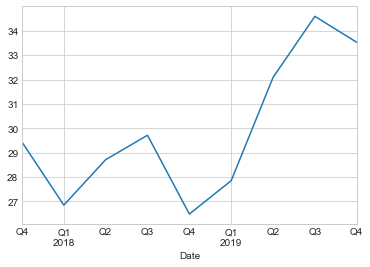

In [4]:
#plotataan eli tehdään viivakaavio päivän päätöshinnoista 'Closing price'
#toiminnolla .resample() voi määritellä minkä ajanjakson haluaa määrittää, ('Q') = vuosineljänneksittäin
#täytyy kertoa millä tunnusluvulla se tehdään, .mean() = keskiarvo

metso['Closing price'].resample('Q').mean().plot()

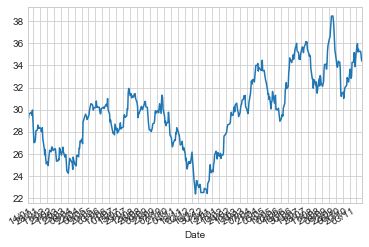

In [5]:
#['2018':] = laitetaan vuoden 2018 alusta ja siitä eteenpäin plotatun arvon tiedot muuttujaan ax1
ax1 = metso['Closing price']['2018':].plot()

#käytän alussa määritettyjä locatoreita tai formattereita muokatakseni aika-akselia

ax1.xaxis.set_major_locator(myLoc)
ax1.xaxis.set_major_formatter(myFmt)

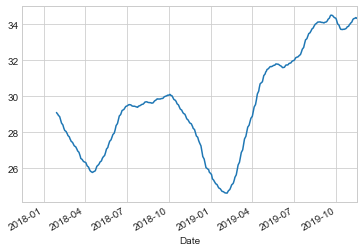

In [6]:
#lasken 50 päivän liukuvan keskiarvon (päivittäin vanhin luku pudotetaan ja lasketaan viimeisimmän esim 50 pv päivän keskiarvo)
#näitä käytetään esim. ostosignaalina, eri osakkeille sopii erilaiset aikavälit

metso['Closing price'].rolling(50).mean().plot()

#liukuva keskiarvo toiminnolla .rolling() ja erikseen määritellään aikaväli (50), jota tarkastellaan
# .mean() laskee keskiarvon ja .plot() tekee viivakaavion

In [7]:

#muutos% laskeminen toiminnolla .pct_change()
#osakkeen päiväkohtainen hintamuutos (päivän päätöshinnoille muutos%) = ['Closing price']

#tehdään uusi sarake metso['Metso%'] 

metso['Metso%'] = metso['Closing price'].pct_change()
metso.head()

,Date,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades,Unnamed: 11,Metso%
Date,,,,,,,,,,,,,
2017-11-15,2017-11-15,29.90,29.92,29.90,29.96,29.54,29.85,29.724,353911,10519644.04,2602,NaN,NaN
2017-11-16,2017-11-16,29.97,29.99,29.95,30.14,29.78,29.97,29.968,456119,13665822.08,3274,NaN,0.004020
2017-11-17,2017-11-17,29.70,29.72,30.12,30.25,29.64,29.64,29.770,374484,11154479.95,1746,NaN,-0.011011
2017-11-20,2017-11-20,30.18,30.19,29.53,30.22,29.50,30.12,29.880,408918,12218447.26,4021,NaN,0.016194
2017-11-21,2017-11-21,30.39,30.41,30.12,30.59,29.93,30.40,30.373,230768,7009078.81,1623,NaN,0.009296


In [8]:
#poistan ylimääräisen sarakkeen 'Date' toiminnolla .drop()
#axis=1 kertoo pytonille että haluan pois 1. sarakkeen, enkä 1. rivin

metso.drop('Date', axis=1)

,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades,Unnamed: 11,Metso%
Date,,,,,,,,,,,,
2017-11-15,29.90,29.92,29.90,29.96,29.54,29.85,29.724,353911,10519644.04,2602,NaN,NaN
2017-11-16,29.97,29.99,29.95,30.14,29.78,29.97,29.968,456119,13665822.08,3274,NaN,0.004020
2017-11-17,29.70,29.72,30.12,30.25,29.64,29.64,29.770,374484,11154479.95,1746,NaN,-0.011011
2017-11-20,30.18,30.19,29.53,30.22,29.50,30.12,29.880,408918,12218447.26,4021,NaN,0.016194
2017-11-21,30.39,30.41,30.12,30.59,29.93,30.40,30.373,230768,7009078.81,1623,NaN,0.009296
2017-11-22,30.35,30.36,30.46,30.62,30.32,30.32,30.418,277666,8445928.22,2327,NaN,-0.002632
2017-11-23,30.26,30.28,30.21,30.37,30.01,30.25,30.217,188729,5702737.59,1588,NaN,-0.002309
2017-11-24,30.01,30.03,30.19,30.32,30.02,30.09,30.123,171240,5158257.08,1163,NaN,-0.005289
2017-11-27,30.25,30.27,30.10,30.43,29.94,30.16,30.249,362275,10958478.77,2765,NaN,0.002326


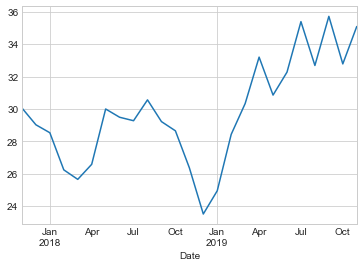

In [9]:
#lasketaan tunnusluvut muutosprosenteille
#keskiarvohinnat .mean() kuukausittain 
metso['Closing price'].resample('M').mean().plot()

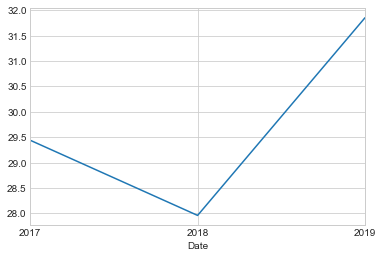

In [10]:
#keskiarvohinnat vuosittain
metso['Closing price'].resample('Y').mean().plot()

In [11]:
#Haluan vertailla kahden saman toimialan osakkeiden hinnan muutosta
#Avaan siis upm:n historialliset kurssitiedot samalta ajalta
upm = pd.read_csv('UPM-2017-11-15-2019-11-15.csv', sep = ';', decimal = ',', skiprows=1)
upm.head()

,Date,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades,Unnamed: 11
0,2019-11-15,30.97,30.99,30.89,31.07,30.62,30.98,30.891,769696,23775293.55,3277,NaN
1,2019-11-14,30.61,30.62,30.90,30.93,30.46,30.59,30.606,1020652,31238382.30,4376,NaN
2,2019-11-13,30.90,30.92,31.13,31.13,30.79,30.90,30.930,1141054,35293131.63,4461,NaN
3,2019-11-12,31.22,31.25,30.98,31.26,30.91,31.20,31.131,1341646,41765577.05,4266,NaN
4,2019-11-11,30.99,31.01,30.63,31.10,30.50,30.98,30.897,844006,26075036.87,3658,NaN


In [12]:
#Samat valmistelut upm-datalle kuin metso-datalle
#Teen muutos-%:lle oman sarakkeen
upm['UPM%'] = upm['Closing price'].pct_change()
#muutetaan päivämäärät niin että Pyton ymmärtää ne
upm.index = pd.to_datetime(upm['Date'])
#järjestetään pienimmästä suurimpaan
upm.sort_index(inplace=True)
upm.head()
#dropataan ylimääräinen sarake
upm.drop('Date', axis=1)

,Bid,Ask,Opening price,High price,Low price,Closing price,Average price,Total volume,Turnover,Trades,Unnamed: 11,UPM%
Date,,,,,,,,,,,,
2017-11-15,25.29,25.30,25.40,25.47,25.03,25.31,25.207,1278738,32232661.30,4754,NaN,-0.008617
2017-11-16,25.52,25.54,25.60,25.72,25.41,25.53,25.541,1492486,38119251.07,5090,NaN,0.000784
2017-11-17,25.54,25.55,25.59,25.66,25.33,25.51,25.523,1188041,30322068.47,4274,NaN,-0.013534
2017-11-20,25.90,25.92,25.48,25.99,25.35,25.86,25.755,1177507,30326601.83,3784,NaN,-0.006149
2017-11-21,25.96,25.98,25.89,26.15,25.57,26.02,25.940,1430044,37095707.26,3946,NaN,0.019992
2017-11-22,25.55,25.56,26.06,26.15,25.51,25.51,25.662,1516534,38916993.20,5213,NaN,-0.003516
2017-11-23,25.56,25.57,25.39,25.67,25.26,25.60,25.500,684169,17446295.25,2772,NaN,0.002742
2017-11-24,25.52,25.54,25.55,25.65,25.41,25.53,25.538,759144,19387345.99,2846,NaN,0.009889
2017-11-27,25.32,25.34,25.45,25.46,25.22,25.28,25.324,1082353,27409450.36,4145,NaN,0.001982


In [13]:
#hinnan muutokset prosentteina edellisestä päivästä
metso['Metso%'] = metso['Closing price'].pct_change()
upm['UPM%'] = upm['Closing price'].pct_change()


In [14]:
#Laitan Metson ja UPM:n prosenttimuutokset samaan dataframeen
hintamuutos = pd.concat([metso['Metso%'], upm['UPM%']], axis=1)

Text(0, 0.5, 'Hintamuutos')

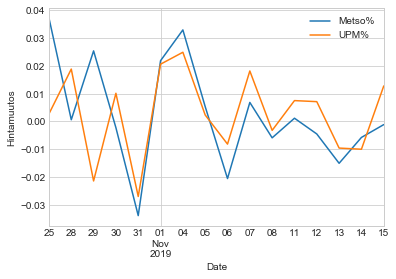

In [22]:
#Katson osakkeiden hintamuutosta 2019 Q3 osavuosikatsausten julkistamisesta lähtien
ax2 = hintamuutos['2019-10-25':].plot()

ax2.set_ylabel('Hintamuutos')


In [16]:
#tunnuslukuja muutosprosenteille
hintamuutos.describe()

,Metso%,UPM%
count,502.000000,502.000000
mean,0.000430,0.000545
std,0.017319,0.016888
min,-0.098432,-0.054118
25%,-0.010295,-0.009770
50%,0.000994,0.000707
75%,0.010324,0.010827
max,0.073153,0.101977


In [31]:
#päivät, jolloin muutosprosentti ollut suurempi kuin 5 %
hintamuutos[(abs(hintamuutos['Metso%'])>0.05) | 
          (abs(hintamuutos['UPM%'])>0.05)]

,Metso%,UPM%
Date,,
2017-12-18,-0.059296,0.024428
2018-01-15,-0.098432,0.002644
2018-04-25,0.073153,-0.019831
2018-07-20,-0.003400,-0.053164
2018-10-23,-0.018579,-0.054118
2018-11-27,-0.005534,-0.051476
2018-12-10,-0.055673,-0.018230
2019-02-06,0.053961,0.008348
2019-07-23,0.006125,0.101977


In [32]:
#yritysten hintamuutoksen välinen korrelaatio
hintamuutos.corr()

,Metso%,UPM%
Metso%,1.000000,0.474437
UPM%,0.474437,1.000000


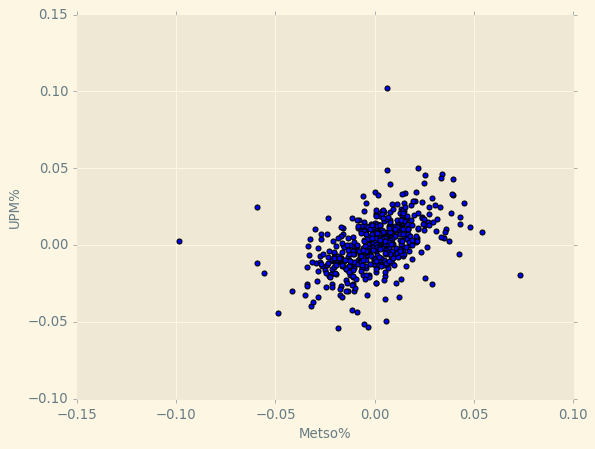

In [72]:
#muutosprosenttien korrelaatio hajontakaavioksi
hintamuutos.plot.scatter(x='Metso%', y='UPM%')

#Muokkaan kuvion ulkonäköä valmiilla grafiikkakomennolla
plt.style.use('seaborn-pastel')